# 순차데이터와 순환신경망
지금까지 인공 신경망에 사용한 데이터는 각 샘플이 독립적인 경우다.  
이런 가정 덕분에 에포크마다 전체 샘플을 섞은 후 훈련이 가능했다.  

</br>


## 순차데이터


우리가 다루는 데이터 중에는 독립적이지 않고 샘플이 서로 연관된  
경우가 많다. 예를 들면 날씨 정보는 샘플이 서로 연관되어 있다.  
이렇게 일정 시간 간격을 배치된 데이터를 시계열 데이터라고 부른다.  

</br>

순서가 있는 데이터를 처리하기 위한 신경망이 순환 신경망이다.  


</br>

## 순환 신경망

뉴런의 출력이 순환 되는 신경망을 말한다.  
다음은 순환 신경망의 구조다.  




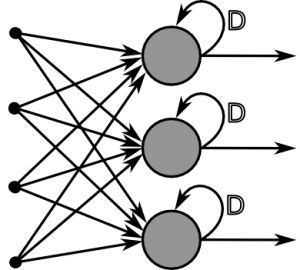

지금까지 보았던 것들과의 큰 차이점이 있으니  
그것은 출력이 다시 입력으로 들어간다는 점이다.  
이것을 순환 구조라고 부르며 이 구조가 있는 층을 순환층이라고 한다.  

</br>

순환 신경망에서는 뉴런을 셀이라고 부른다.  
뉴런마다 순환 구조를 표현하기 번거롭기 때문에 셀 하나에 순환 구조를  
나타내는 경우가 많다.

# 정뱡향 계산

순환층, 입력층, 출력층을 가진 아주 단순한 순환 신경망을 그림으로 나타내면  
다음과 같다.  

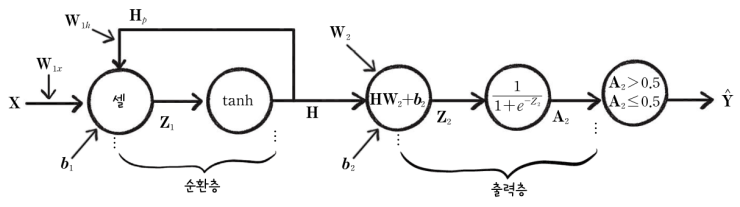

순환층의 정방향 계산은 아래와 같다.  

Z<sub>1</sub> = XW<sub>1x</sub> + H<sub>p</sub>W<sub>1h</sub> + b<sub>1</sub>  
H = tanh(z<sub>1</sub>)
  
출력층의 정방향 계산은 아래와 같다.  
  
Z<sub>2</sub> = HW<sub>2</sub> + b<sub>2</sub>  
A<sub>2</sub> = sigmoid(z<sub>2</sub>)

</br>
</br>
</br>

이제 정방향 계산에 필요한 입력과 가중치 구조를 알아보자  
입력에 곱해지는 가중치 W<sub>1x</sub>의 크기는 (<i>n<sub>f</sub>, n<sub>c</sub></i>)이다.  
여기서 <i>n<sub>c</sub></i>는 순환층에 있는 셀의 수다.  

</br>

입력데이터 X와 가중치 W<sub>1x</sub>를 곱한 값은 아래와 같다.  
XW<sub>1x</sub> =  (<i>m, n<sub>c</sub></i>)  

</br>

이전 은닉 상태인 H<sub>p</sub>의 크기도 (<i>m, n<sub>c</sub></i>)가 된다.  
H<sub>p</sub>W<sub>1h</sub> = (<i>m, n<sub>c</sub></i>)

</br>

출력층은 간단하다.  
여기서는 이진분류를 다루기 때문에 1이 들어간다.  
HW<sub>2</sub> = <i>(m, 1)</i>

# 역방향 계산
역방향 계산을 그림으로 표현하면 다음과 같다.  


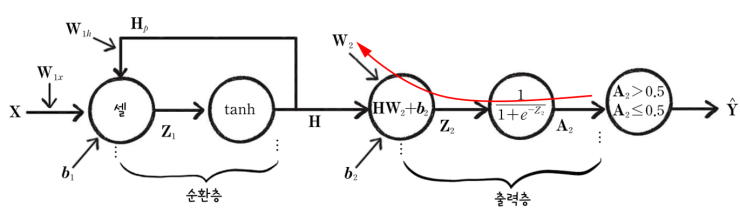